# Preprocessing of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import sklearn

#from google.colab import drive
#drive.mount('/content/drive')

Import the data for the NJ train network. Month of March 2018. Drop the observations with NaN delay.

In [2]:
df = pd.read_csv('Outward.csv') #for example
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

Encoding the days of the week (0 : Monday ..., 6 : Sunday) 

In [3]:
day = []
time = []

for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df['day'] = day
df['time'] = time

In [4]:
df.head(n=20)

,Unnamed: 0,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,0,2018-03-01,3805,1.0,New York Penn Station,105,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit,4,81
1,1,2018-03-01,3805,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit,4,91
2,2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit,4,100
3,3,2018-03-01,3805,4.0,Newark Penn Station,107,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,105
4,4,2018-03-01,3805,5.0,Newark Airport,37953,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,109
5,5,2018-03-01,3805,6.0,North Elizabeth,109,Elizabeth,41,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016667,departed,Northeast Corrdr,NJ Transit,4,112
6,6,2018-03-01,3805,7.0,Elizabeth,41,Linden,70,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083333,departed,Northeast Corrdr,NJ Transit,4,118
7,7,2018-03-01,3805,8.0,Linden,70,Rahway,127,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,departed,Northeast Corrdr,NJ Transit,4,121
8,8,2018-03-01,3805,9.0,Rahway,127,Metropark,83,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,departed,Northeast Corrdr,NJ Transit,4,128
9,9,2018-03-01,3805,10.0,Metropark,83,Metuchen,84,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,133


Encoding the line names and the departure station with label encoding

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['line'] = le.fit_transform(df['line'])
df['from_id'] = le.fit_transform(df['from_id'])
df['train_id'] = le.fit_transform(df['train_id'])

In [6]:
df.head(5)

,Unnamed: 0,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,0,2018-03-01,262,1.0,New York Penn Station,85,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,6,NJ Transit,4,81
1,1,2018-03-01,262,2.0,New York Penn Station,85,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,6,NJ Transit,4,91
2,2,2018-03-01,262,3.0,Secaucus Upper Lvl,143,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,6,NJ Transit,4,100
3,3,2018-03-01,262,4.0,Newark Penn Station,87,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,6,NJ Transit,4,105
4,4,2018-03-01,262,5.0,Newark Airport,139,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,6,NJ Transit,4,109


In [7]:
df.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)

In [8]:
df.head(n=5)
df['delay_seconds'] = df['delay_minutes']*60
df.drop(columns=['delay_minutes'],inplace=True)
#len(df)


In [9]:
df.sort_values(by=['train_id','day'])
df.head(50)
len(df[df['line']==6])

19403

In [10]:
df.head(5)

,Unnamed: 0,train_id,stop_sequence,from_id,line,day,time,delay_seconds
0,0,262,1.0,85,6,4,81,0.0
1,1,262,2.0,85,6,4,91,8.0
2,2,262,3.0,143,6,4,100,7.0
3,3,262,4.0,87,6,4,105,10.0
4,4,262,5.0,139,6,4,109,10.0


Trial on one line, for one stop

In [11]:
#The create_dataset function is greatly inspired by : 
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

# LSTM with window regression framing

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :] #possibility of having many features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Using TensorFlow backend.


In [25]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset, I chose to work on line 7 only as an example
df_line_6 = df[df['line']==6]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
#df = scaler.fit_transform(df)#.reshape(-1,1))

dataset_test = df_line_6[df_line_6['stop_sequence'] == 10]
dataset_test = dataset_test[['delay_seconds','stop_sequence','time','line','day']]
dataset_test = scaler.fit_transform(dataset_test)

#dataset_train = df[(df['line'] != 6)]
dataset_train = df[(df['stop_sequence'] != 10)]#df['stop_sequence'] != 10]
dataset_train = dataset_train[['delay_seconds','stop_sequence','time','line','day']]
dataset_train = scaler.fit_transform(dataset_train)

#dataset_test = dataset_test.values
dataset_test = dataset_test.astype('float32')

#dataset_train = dataset_train.values
dataset_train = dataset_train.astype('float32')


In [26]:
print(df.shape)
print(dataset_train.shape)
print(dataset_test.shape)

(110471, 8)
(103844, 5)
(1133, 5)


In [27]:
# split into train and test sets
train = dataset_train
test = dataset_test

# reshape into X=t and Y=t+look_back-1
look_back = 7 #for example
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input dimensions to be [delay, time, features] with the features being the following delays
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

In [28]:
print(testX.shape)
print(testY.shape)

(1125, 7, 5)
(1125,)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 5)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
model.summary()

Epoch 1/10
 - 284s - loss: 0.0023 - accuracy: 0.1608
Epoch 2/10
 - 277s - loss: 0.0016 - accuracy: 0.1607
Epoch 3/10


In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
#for now, manual inverse scaling, so we should get the min and max for each set

df_stop_test = df_line_6[df_line_6['stop_sequence']==10]
df_groundtruth_test = df_stop_test['delay_seconds']

df_stop_train = df_line_6[df_line_6['stop_sequence']!=10]
df_groundtruth_train = df_stop_train['delay_seconds']


In [21]:
print(np.max(df_groundtruth_test))
print(np.max(df_groundtruth_train))

5100.0
5305.000000002


In [27]:
print(testPredict)
print(testY)

[[0.5275141 ]
 [0.03887013]
 [0.02043133]
 ...
 [0.07697601]
 [0.03803737]
 [0.07808708]]
[0.01187559 0.0135721  0.3990575  ... 0.04561734 0.09161168 0.03449576]


In [0]:
#for now, manual inverse scaling :(

trainPredict_norm = trainPredict*5305
testPredict_norm = testPredict*5305
trainY_norm = trainY*5305
testY_norm = testY*5305

In [29]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_norm, trainPredict_norm[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_norm, testPredict_norm[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 269.63 RMSE
Test Score: 583.79 RMSE


In [31]:
#Transform back to delays in minutes, the time still has to change too

groundtruth_test = df_groundtruth_test.to_numpy()
groundtruth_train = df_groundtruth_train.to_numpy()

df_time = df['time'][(df['line'] == 6) & (df['stop_sequence']==10)]/60
np.max(df_time)

df_test_plot = pd.DataFrame()
df_test_plot['Time'] = df_time[4:-1] #testX[:,1][:,1]
df_test_plot['TestY'] = testY_norm*5305/5100/60
df_test_plot['Predict'] = testPredict_norm/60
df_test_plot['Groundtruth'] = groundtruth_test[4:-1]/60 #attention to this, caused by the look back

df_test_plot.head()

,Time,TestY,Predict,Groundtruth
511,16.633333,1.050000,44.838699,1.050000
582,17.366667,1.200000,3.303962,1.200000
945,10.483333,35.283333,1.736663,35.283333
1018,9.016667,1.250000,28.285160,1.250000
1331,22.816667,2.150000,2.889126,2.150000


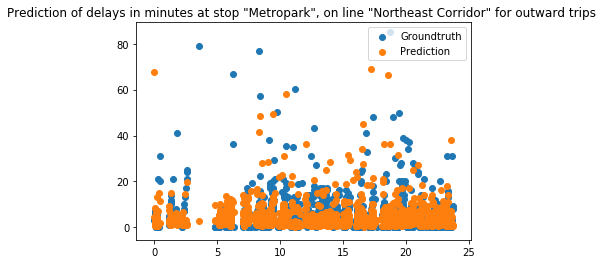

In [32]:
plt.scatter(df_test_plot['Time'],df_test_plot['Groundtruth'],label='Groundtruth')
plt.scatter(df_test_plot['Time'],df_test_plot['Predict'],label='Prediction')
plt.title('Prediction of delays in minutes at stop "Metropark", on line "Northeast Corridor" for outward trips ')
plt.legend()
plt.show()